<center> Lab1 Assignment </center>
Rushabh Patel - 202001419 <br>
Krunal Patel - 202001445

<center> Problem 1 </center>

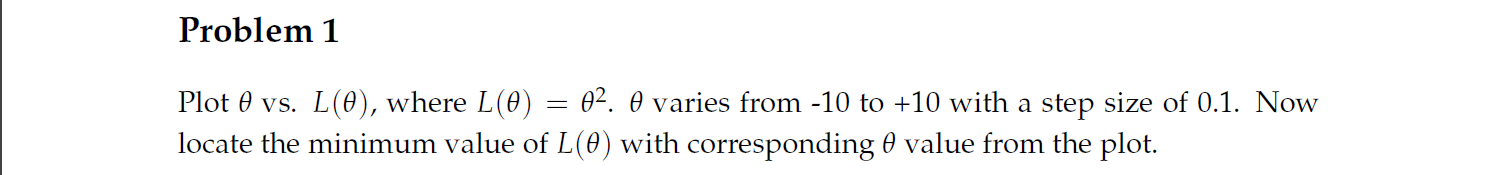

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

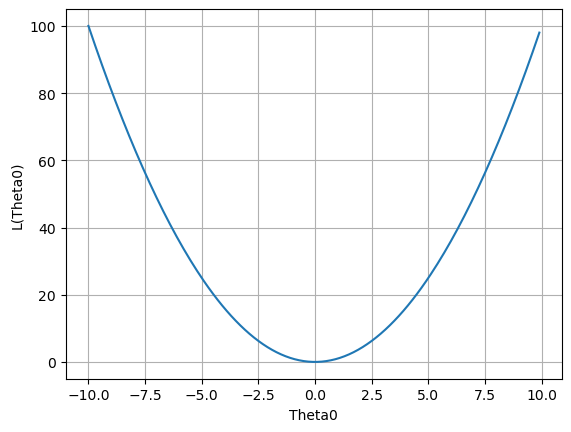

In [2]:
theta0 = np.arange(-10, 10, 0.1)
L = theta0**2
plt.plot(theta0, L)
plt.xlabel("Theta0")
plt.ylabel("L(Theta0)")
plt.grid(True)
plt.show()

In [3]:
print(f"Minimum value of L(Theta0) = {np.round(np.min(L))}")

Minimum value of L(Theta0) = 0.0


<center> Problem 2 </center>

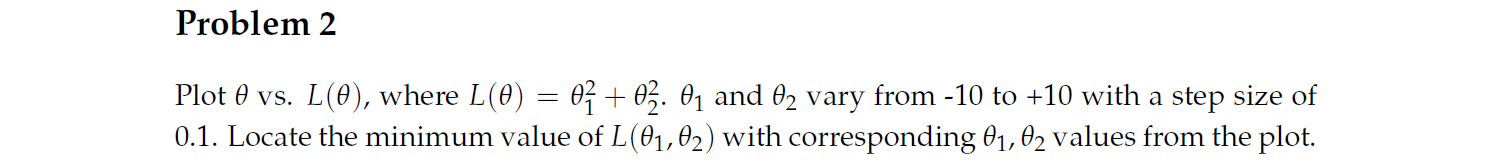

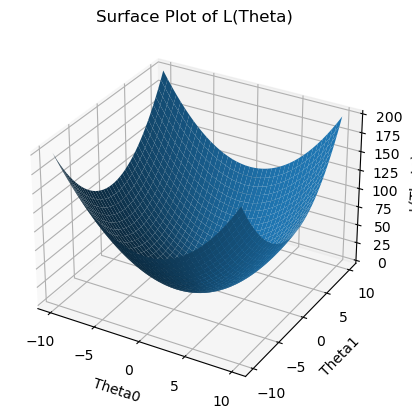

In [4]:
theta0 = np.arange(-10, 10.1, 0.1)
theta1 = np.arange(-10, 10.1, 0.1)
theta0, theta1 = np.meshgrid(theta0, theta1)  
L = theta0**2 + theta1**2

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(theta0, theta1, L)

ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('L(Theta)')
ax.set_title('Surface Plot of L(Theta)')
plt.grid(True)
plt.show()

In [5]:
print(f"Minimum value of L(Theta0) = {np.round(np.min(L))}")

Minimum value of L(Theta0) = 0.0


<center> Problem 3 </center>

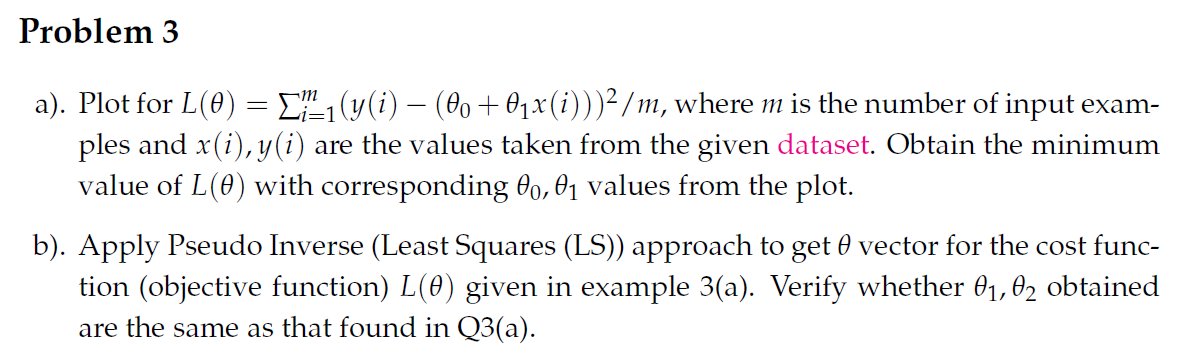

In [6]:
df = pd.read_excel(r"D:\DAIICT\Semester VII\IE - 406 Machine Learning\Lab Assignments\Lab1\DataSet.xlsx")
x = np.array(df["x"])
y = np.array(df["y"])

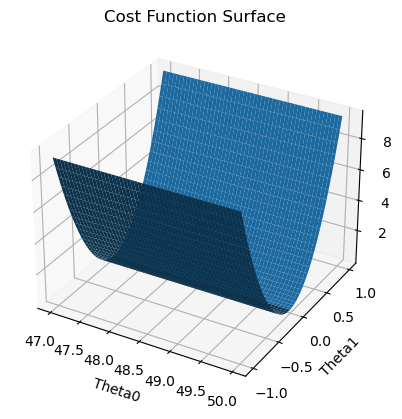

In [7]:
# Q3.A
theta0 = np.arange(47, 50, 0.01)
theta1 = np.arange(-1, 1, 0.0005)
L = np.ones([len(theta1), len(theta0)])

for i in range(len(theta1)):
    for j in range(len(theta0)):
        prediction = theta0[j] + theta1[i]*x
        error = y - prediction
        L[i][j] = np.sum((error**2)/len(x))
[row , column] = np.where(L == np.min(L))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
theta_0, theta_1 = np.meshgrid(theta0, theta1)
ax.plot_surface(theta_0, theta_1, L)
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost function L(Theta)')
plt.title('Cost Function Surface')
plt.show()

In [8]:
print ("Theta 0 = ", theta0[column])
print ("Theta 1 = ", theta1[row])
print ("L(Theta) = ", L[row, column])

Theta 0 =  [48.91]
Theta 1 =  [-0.0085]
L(Theta) =  [16.73830597]


In [9]:
# Q3.B
df = pd.read_excel(r"D:\DAIICT\Semester VII\IE - 406 Machine Learning\Lab Assignments\Lab1\DataSet.xlsx")
x = np.array(df["x"])
y = np.array(df["y"])

x = np.column_stack((np.ones(x.shape[0]), x))       # Add a column of ones for the bias term
theta_real = np.linalg.inv(x.T @ x) @ x.T @ y       # Calculate the coefficients using the normal equation
print(f"Theta values = {theta_real}")

Theta values = [ 4.92376299e+01 -8.61193478e-03]


<center> Problem 4 </center>

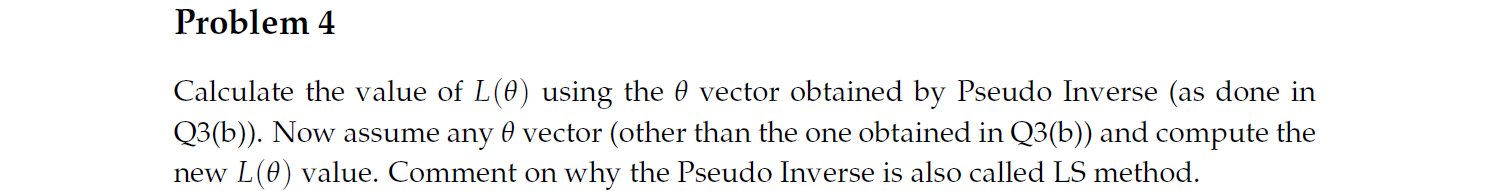

In [10]:
import random

df = pd.read_excel(r"D:\DAIICT\Semester VII\IE - 406 Machine Learning\Lab Assignments\Lab1\DataSet.xlsx")
x = np.array(df["x"])
y = np.array(df["y"])

x = np.column_stack((np.ones(x.shape[0]), x))                   # Add a column of ones for the bias term
y = np.reshape(y, (len(x), 1))

theta_random = np.array([[random.uniform(0, 100)], [random.uniform(-1, 0)]])   # Getting random theta vector
theta_real = np.reshape(theta_real, (2, 1))

L_theta_random = np.sum((y - (x @ theta_random))**2 , axis = 0)     # L_theta for random theta vactor
L_theta_real = np.sum((y - (x @ theta_real))**2 , axis = 0)     # L_theta for actual theta vactor

print (f"Random values of theta: {L_theta_random}")
print (f"Real value of theta : {L_theta_real}")

Random values of theta: [7.02020229e+08]
Real value of theta : [1572.65036689]


The Pseudo Inverse method is often referred to as the Least Squares (LS) method because it aims to minimize the sum of squared differences between the predicted values and the actual target values. The term "Least Squares" comes from the fact that the method seeks to find the coefficients that minimize the sum of the squares of the residuals, providing the best-fitting line through the data in terms of minimizing the overall error.

<center> Problem 5 </center>

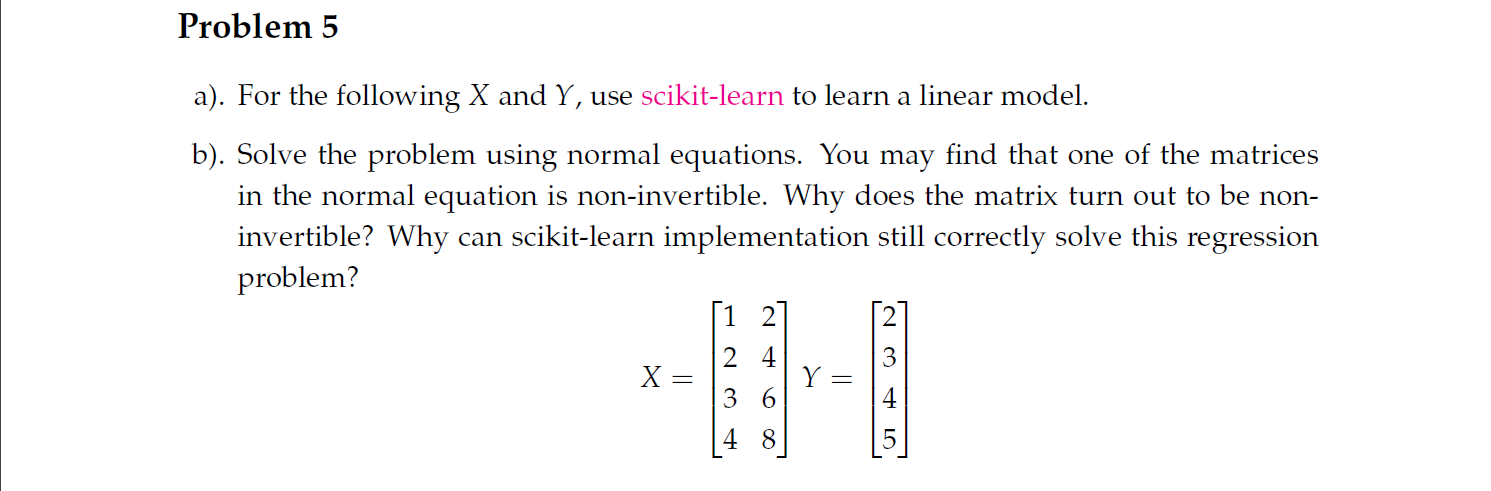

In [11]:
# Q5.A
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()

x_train = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])
y_train = np.array([2, 3, 4, 5])
regressor.fit(x_train, y_train)
print(f"Regression Coefficient = {regressor.coef_}")
print(f"Regression Intercept   = {regressor.intercept_}")

Regression Coefficient = [0.2 0.4]
Regression Intercept   = 0.9999999999999996


In [12]:
# Q5.B
x_train = np.column_stack((np.ones(x_train.shape[0]), x_train))         # Add a column of ones for the bias term
theta = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train        # Calculate the coefficients using the normal equation

LinAlgError: Singular matrix

Scikit-learn's implementation of linear regression can still handle these cases effectively. It employs efficient numerical methods like Singular Value Decomposition (SVD) that allow it to handle situations with linear dependency among features and avoid direct calculation of matrix inverses. Scikit-learn's algorithms can still find approximate solutions that work well in practice even when explicit matrix inversion is not possible.

<center> Problem 6 </center>

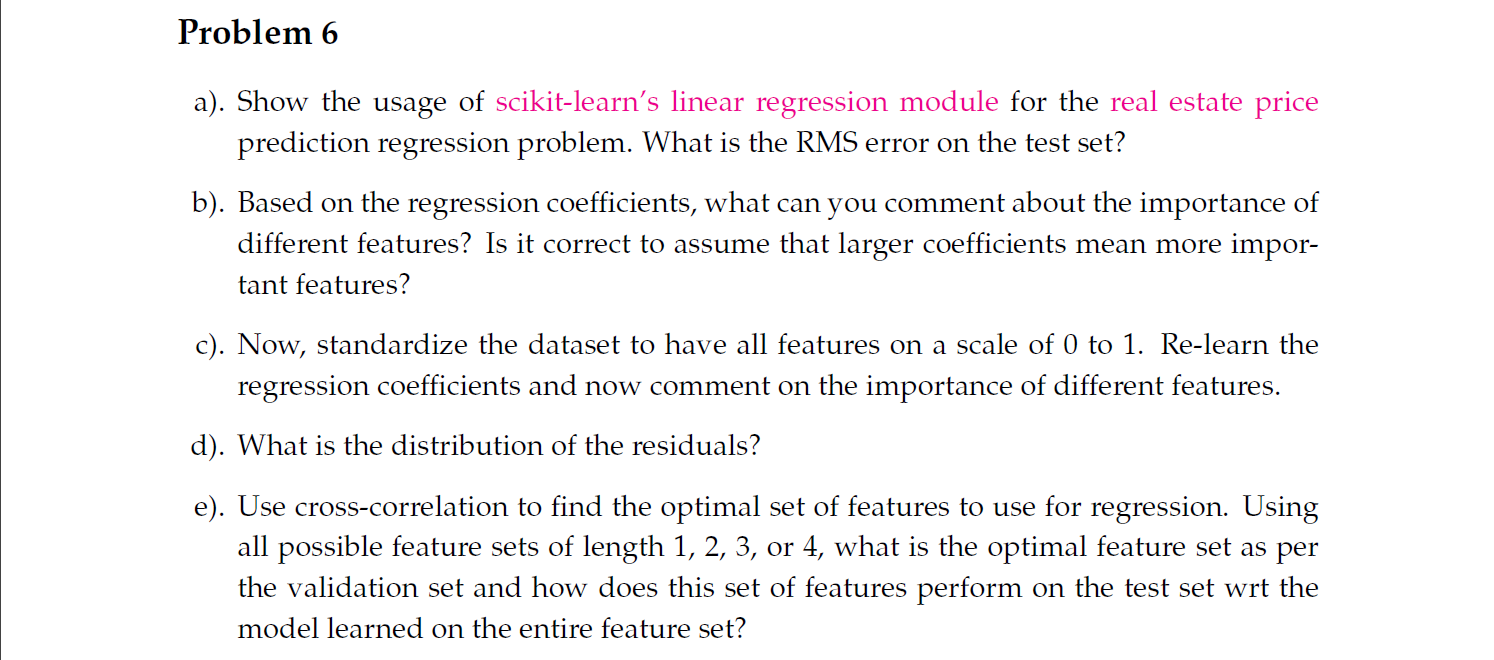

Text(0.5, 1.0, 'Area vs Price Scatter Plot')

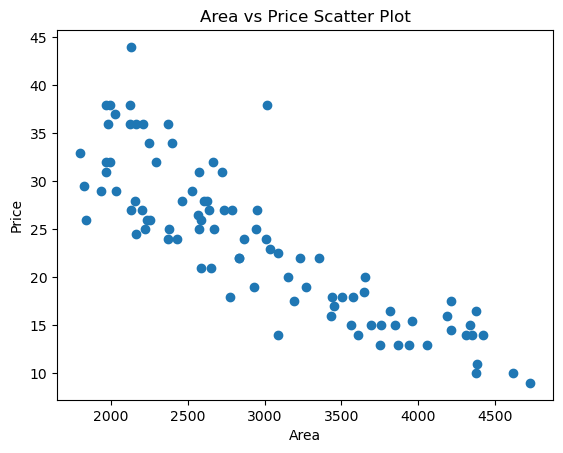

In [13]:
df = pd.read_excel(r"D:\DAIICT\Semester VII\IE - 406 Machine Learning\Lab Assignments\Lab1\DataSet.xlsx")
x = np.array(df["x"]).reshape(-1, 1)
y = np.array(df["y"])

plt.scatter(x, y)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price Scatter Plot")

In [14]:
# Q6.A
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
regressor = LinearRegression()

regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
RMS = np.sqrt(np.mean(np.square(pred - y_test)))
print(f"Regressor Coefficient = {regressor.coef_}")
print(f"Regressor Intercept = {regressor.intercept_}")
print(f"Root Mean Square Error for test set = {RMS}")

Regressor Coefficient = [-0.00876524]
Regressor Intercept = 49.80659501207674
Root Mean Square Error for test set = 2.6431535658027796


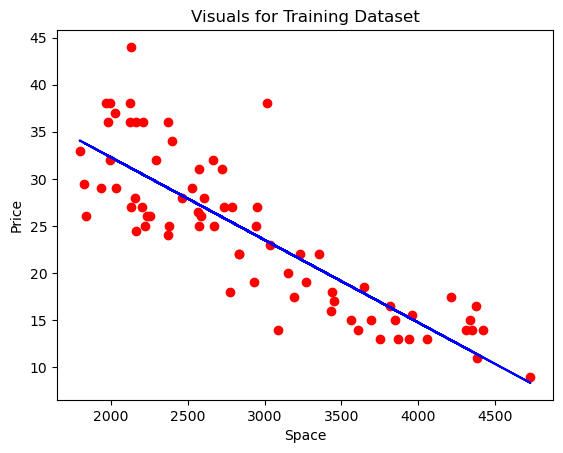

In [15]:
#Visualizing the training Test Results 
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

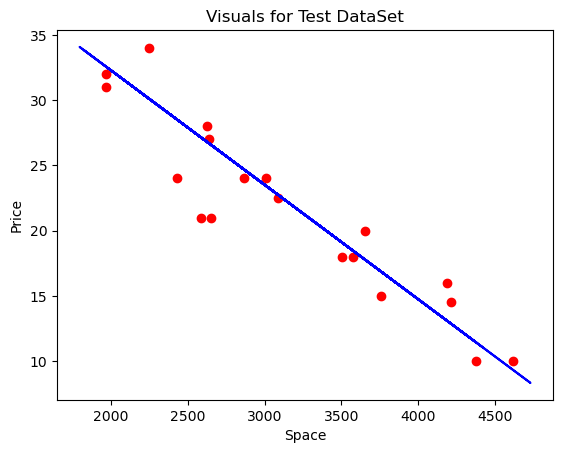

In [16]:
#Visualizing the Test Results 
plt.scatter(x_test, y_test, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

Larger coefficients can indicate a potentially stronger relationship between a feature and the target variable, it's not a universally reliable indicator of feature importance. Here's why: <br>
1. The magnitude of a coefficient depends on the scale of the corresponding feature. If features are on different scales, a larger coefficient might simply be a consequence of the different scales rather than a stronger impact on the target. <br>
2. When features are correlated (multicollinear), their coefficients can become unstable and change significantly based on minor changes in the data or model. This can make it difficult to interpret their individual importance. <br>

In [17]:
df = pd.read_excel(r"D:\DAIICT\Semester VII\IE - 406 Machine Learning\Lab Assignments\Lab1\DataSet.xlsx")
x = np.array(df["x"]).reshape(-1, 1)
y = np.array(df["y"])

In [18]:
# Q6. C
from sklearn import preprocessing
min_max_x = preprocessing.MinMaxScaler()
min_max_y = preprocessing.MinMaxScaler()

x = min_max_x.fit_transform(x)
y = min_max_y.fit_transform(y.reshape(-1, 1))

In [19]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
pred = regressor.predict(x_test)
RMS = np.sqrt(np.mean(np.square(pred - y_test)))
print(f"Regressor Coefficient = {regressor.coef_}")
print(f"Regressor Intercept = {regressor.intercept_}")
print(f"Root Mean Square Error for test set = {RMS}")

Regressor Coefficient = [[-0.74349256]]
Regressor Intercept = [0.71687413]
Root Mean Square Error for test set = 0.09029020659395713


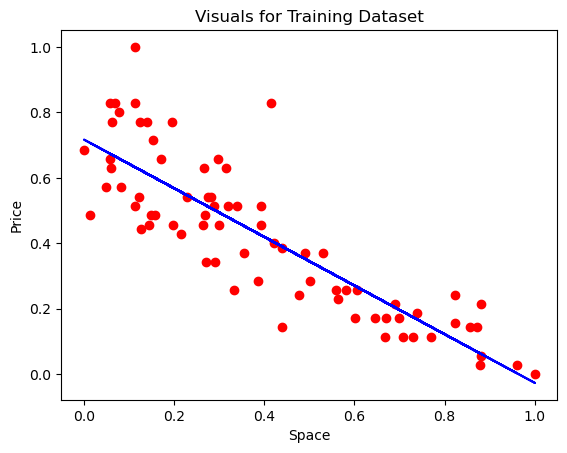

In [20]:
#Visualizing the training Test Results 
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

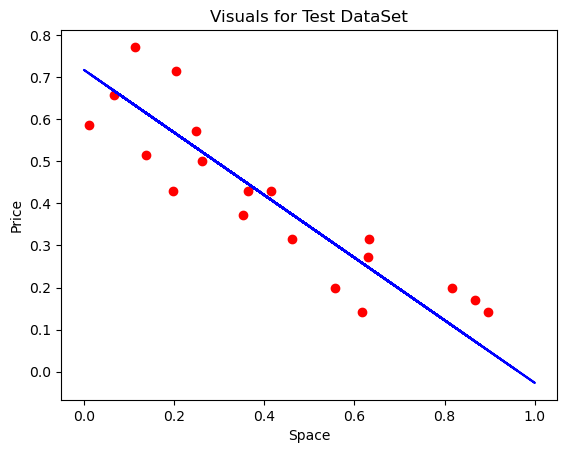

In [21]:
#Visualizing the Test Results 
plt.scatter(x_test, y_test, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

C:\Users\dell8\AppData\Local\Temp\ipykernel_20192\1616823328.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


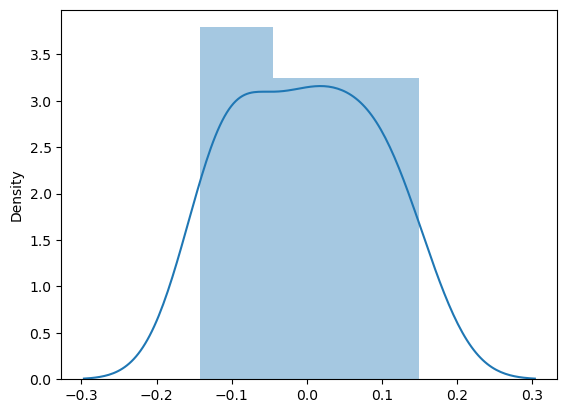

In [22]:
# Q6.D
import seaborn as sns
residual = y_test - pred
sns.distplot(residual)
plt.show ()